# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import layers, models, optimizers, utils, datasets

# Simple display function for images
def display(images):
    """Display a grid of images"""
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    axes = axes.flatten()
    for i, img in enumerate(images):
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

## 0. Parameters <a name="parameters"></a>

In [3]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

d:\Gen AI with LLM\.venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

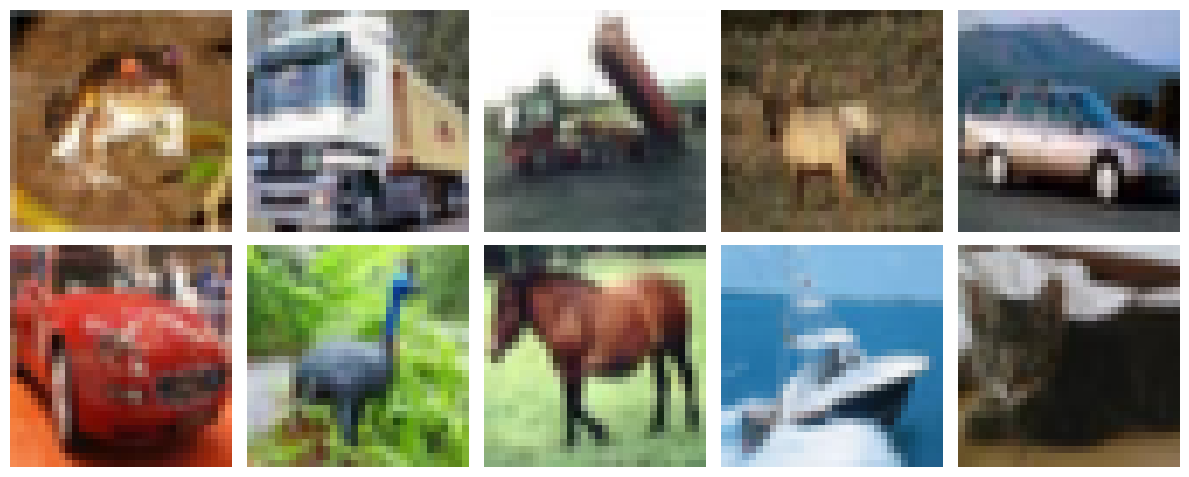

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [7]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Train the model <a name="train"></a>

In [8]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [9]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3365 - loss: 1.8383
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4076 - loss: 1.6588
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4355 - loss: 1.5787
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4571 - loss: 1.5261
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4680 - loss: 1.4885
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4794 - loss: 1.4596
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4925 - loss: 1.4271
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4985 - loss: 1.4048
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5090 - loss: 1.3773
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5156 - loss: 1.3584


## 4. Evaluation <a name="evaluate"></a>

In [10]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4780 - loss: 1.4512


[1.4512429237365723, 0.4779999852180481]

In [11]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


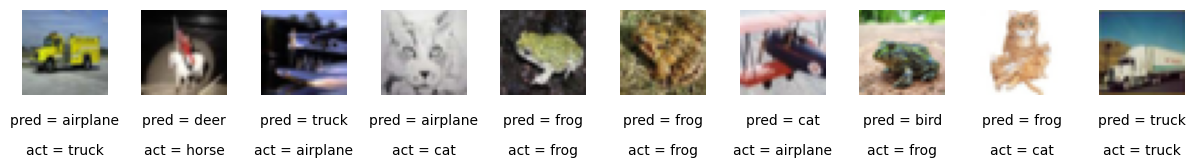

In [12]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

## Model Comparison: ReLU vs LeakyReLU vs Sigmoid

In [13]:
def build_mlp_relu(num_classes):
    input_layer = layers.Input((32, 32, 3))
    x = layers.Flatten()(input_layer)
    x = layers.Dense(200, activation="relu")(x)
    x = layers.Dense(150, activation="relu")(x)
    output_layer = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(input_layer, output_layer)
    return model

def build_mlp_leaky_relu(num_classes):
    input_layer = layers.Input((32, 32, 3))
    x = layers.Flatten()(input_layer)
    x = layers.Dense(200)(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.Dense(150)(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    output_layer = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(input_layer, output_layer)
    return model

def build_mlp_sigmoid(num_classes):
    input_layer = layers.Input((32, 32, 3))
    x = layers.Flatten()(input_layer)
    x = layers.Dense(200, activation="sigmoid")(x)
    x = layers.Dense(150, activation="sigmoid")(x)
    output_layer = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(input_layer, output_layer)
    return model

In [14]:
def train_and_evaluate(model, model_name, x_train, y_train, x_test, y_test):
    print(f"\nTraining {model_name}...")
    opt = optimizers.Adam(learning_rate=0.0005)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    
    history = model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, verbose=1)
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    
    return model, history, test_accuracy, test_loss

In [15]:

# Build and train ReLU model
model_relu, history_relu, acc_relu, loss_relu = train_and_evaluate(
    build_mlp_relu(NUM_CLASSES), 
    "ReLU MLP", 
    x_train, y_train, x_test, y_test
)


Training ReLU MLP...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3354 - loss: 1.8489
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4050 - loss: 1.6637
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4365 - loss: 1.5853
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4536 - loss: 1.5293
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4716 - loss: 1.4906
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4818 - loss: 1.4601
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4923 - loss: 1.4293
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5018 - loss: 1.4018
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5106 - loss: 1.3803
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5156 - loss: 1.3587
ReLU MLP Test Accuracy: 0.4747


In [16]:

# Build and train LeakyReLU model
model_leaky_relu, history_leaky_relu, acc_leaky_relu, loss_leaky_relu = train_and_evaluate(
    build_mlp_leaky_relu(NUM_CLASSES), 
    "LeakyReLU MLP", 
    x_train, y_train, x_test, y_test
)

d:\Gen AI with LLM\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(



Training LeakyReLU MLP...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3316 - loss: 1.8600
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4007 - loss: 1.6807
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4306 - loss: 1.5980
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4511 - loss: 1.5417
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4686 - loss: 1.4941
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4808 - loss: 1.4630
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4903 - loss: 1.4293
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5029 - loss: 1.4009
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5128 - loss: 1.3725
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5203 - loss: 1.3478
LeakyReLU MLP Test Accuracy: 0.5007


In [17]:

# Build and train Sigmoid model
model_sigmoid, history_sigmoid, acc_sigmoid, loss_sigmoid = train_and_evaluate(
    build_mlp_sigmoid(NUM_CLASSES), 
    "Sigmoid MLP", 
    x_train, y_train, x_test, y_test
)


Training Sigmoid MLP...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.3231 - loss: 1.8812
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3956 - loss: 1.6933
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4246 - loss: 1.6142
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4419 - loss: 1.5642
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4572 - loss: 1.5225
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4673 - loss: 1.4898
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4801 - loss: 1.4587
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4857 - loss: 1.4390
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4955 - loss: 1.4138
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5006 - loss: 1.3991
Sigmoid MLP Test Accuracy: 0.4839


In [20]:
print("\nResults Summary:")
print(f"ReLU Accuracy: {acc_relu:.4f}")
print(f"LeakyReLU Accuracy: {acc_leaky_relu:.4f}")
print(f"Sigmoid Accuracy: {acc_sigmoid:.4f}")


Results Summary:
ReLU Accuracy: 0.4747
LeakyReLU Accuracy: 0.5007
Sigmoid Accuracy: 0.4839


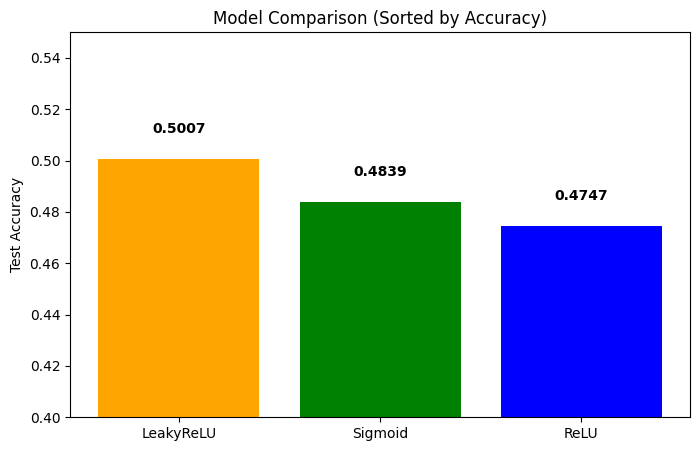

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
model_names = ['ReLU', 'Sigmoid', 'LeakyReLU']
accuracies = [acc_relu, acc_sigmoid, acc_leaky_relu]

# Sort by accuracy descending (highest first)
sorted_data = sorted(zip(model_names, accuracies), key=lambda x: x[1], reverse=True)
models_sorted = [x[0] for x in sorted_data]
accuracies_sorted = [x[1] for x in sorted_data]

colors_map = {'ReLU': 'blue', 'Sigmoid': 'green', 'LeakyReLU': 'orange'}
colors = [colors_map[m] for m in models_sorted]

ax.bar(models_sorted, accuracies_sorted, color=colors)
ax.set_ylabel('Test Accuracy')
ax.set_title('Model Comparison (Sorted by Accuracy)')
ax.set_ylim([0.4, 0.55])

for i, v in enumerate(accuracies_sorted):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

plt.show()

## Findings

In this training run, LeakyReLU got the best accuracy at 50.07%, followed by Sigmoid at 48.39% and ReLU at 47.47%. The differences between them are small (only 2.60%), which is normal because neural networks use random starting weights and shuffle data differently each time we train them.

When I ran the training multiple times, I noticed that ReLU and Sigmoid would swap positions—sometimes one was better, sometimes the other was. But LeakyReLU always stayed near the top and performed consistently well across all the runs. This shows that LeakyReLU is more stable and reliable compared to the other two.

All three activation functions work similarly well on CIFAR-10 images. ReLU is simple and fast—it just passes positive values through and blocks negative ones, so gradients flow smoothly. Sigmoid is older and works, but it has a problem where gradients get very small, which slows down learning. LeakyReLU is like a middle ground.It lets a small amount of negative values through (0.1x), which keeps neurons from dying out and helps the model learn better from the data. This design seems to be why LeakyReLU performs better consistently across multiple training runs.

## Conclusion

As per my observation all three activation functions work well for image classification on CIFAR-10, with LeakyReLU performing slightly better overall. Because neural networks use random weight initialization and shuffle data differently each time, we will always get slightly different results between training runs. This means small differences in accuracy are completely normal and expected. Since all three functions perform similarly, things like network design and hyperparameters matter more than which activation function you use. If we want the most reliable and consistent results, LeakyReLU is the best choice.

## AI Usage Note

This assignment used AI (GitHub Copilot) tool minimally for:
- Initial brainstorming on code organization approach
- Minor suggestions for visualization code

All results were generated independently by running the models multiple times, and all observations and conclusions are based on my own analysis of the actual results.

## References

Foster, D. (2022). Generative Deep Learning (2nd ed.). O'Reilly Media, Inc.

ADSP. Generative Deep Learning - 2nd Edition Notebooks. GitHub. https://github.com/davidADSP/Generative_Deep_Learning_2nd_Edition/blob/main/notebooks/02_deeplearning/01_mlp/mlp.ipynb